**Dataset 1: Simulate a sine curve between 60° and 300° with some random noise.**

   Angle (Degrees)  Sine Value  Noisy Sine Value
0        60.000000    0.866025          0.827025
1        62.424242    0.886400          0.945324
2        64.848485    0.905187          0.772019
3        67.272727    0.922354          0.944949
4        69.696970    0.937871          0.790878


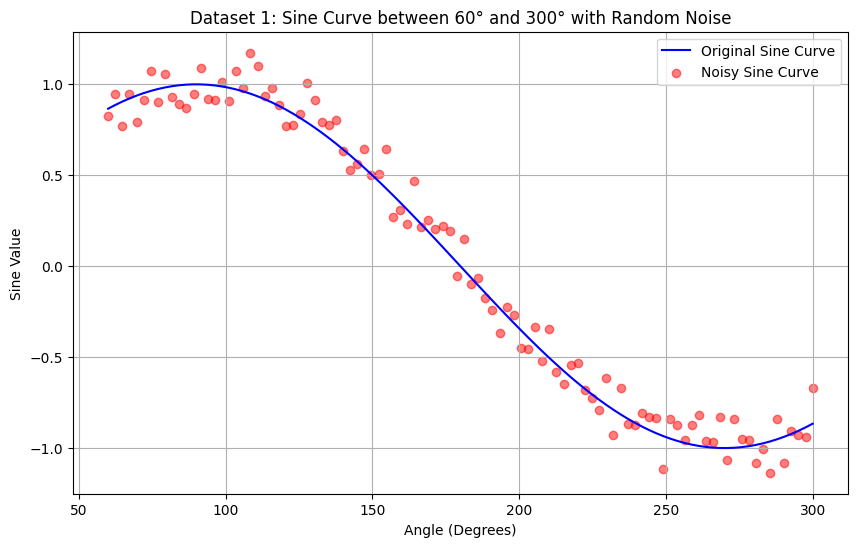

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

angles_deg = np.linspace(60, 300, 100)
angles_rad = np.radians(angles_deg)

sine_values = np.sin(angles_rad)

noise = np.random.normal(0, 0.1, size=sine_values.shape)

noisy_sine_values = sine_values + noise

df = pd.DataFrame({'Angle (Degrees)': angles_deg, 'Sine Value': sine_values, 'Noisy Sine Value': noisy_sine_values})

print(df.head())


plt.figure(figsize=(10, 6))
plt.plot(df['Angle (Degrees)'], df['Sine Value'], label='Original Sine Curve', color='b')
plt.scatter(df['Angle (Degrees)'], df['Noisy Sine Value'], label='Noisy Sine Curve', color='r', alpha=0.5)
plt.title("Dataset 1: Sine Curve between 60° and 300° with Random Noise")
plt.xlabel("Angle (Degrees)")
plt.ylabel("Sine Value")
plt.legend()
plt.grid(True)
plt.show()

**1. Perform Linear Regression on Dataset 1 by computing cost function and gradient descent from scratch.**

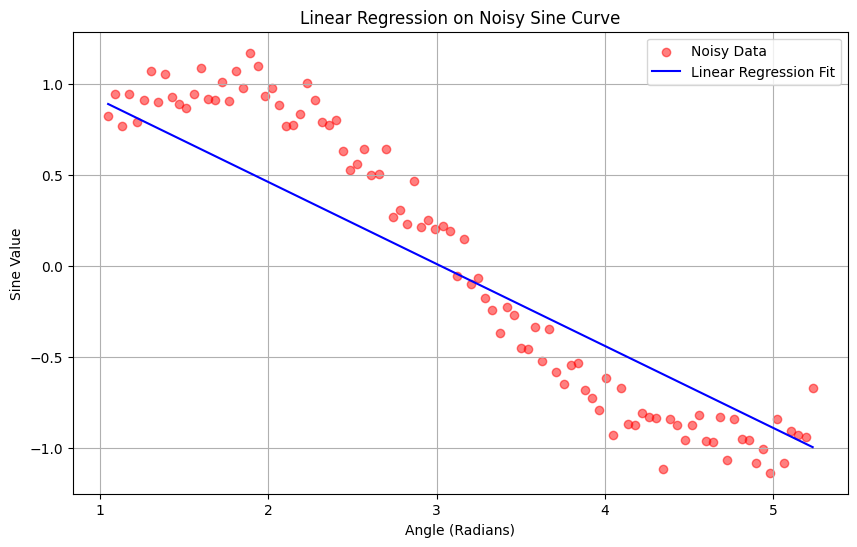

In [ ]:
def compute_cost(a0, a1, x, y):
    m = len(y)
    predictions = a0 + a1 * x
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(x, y, a0, a1, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = a0 + a1 * x
        error = predictions - y
        a0 -= alpha * (1/m) * np.sum(error)
        a1 -= alpha * (1/m) * np.sum(error * x)
        cost_history.append(compute_cost(a0, a1, x, y))
    return a0, a1, cost_history

a0, a1 = 0, 0
alpha = 0.01
iterations = 1000

a0_final, a1_final, cost_history = gradient_descent(angles_rad, noisy_sine_values, a0, a1, alpha, iterations)


plt.figure(figsize=(10, 6))
plt.scatter(angles_rad, noisy_sine_values, label='Noisy Data', color='r', alpha=0.5)
plt.plot(angles_rad, a0_final + a1_final * angles_rad, color='blue', label='Linear Regression Fit')
plt.legend()
plt.title("Linear Regression on Noisy Sine Curve")
plt.xlabel("Angle (Radians)")
plt.ylabel("Sine Value")
plt.grid(True)
plt.show()

**Dataset 2: food_truck_data.csv**

**2. Use sklearn to perform linear regression, Lasso and Ridge on Dataset 2, show the scatter plot for best
fit line using matplotlib and show the results using MSE.**


Model Without Train-Test Split



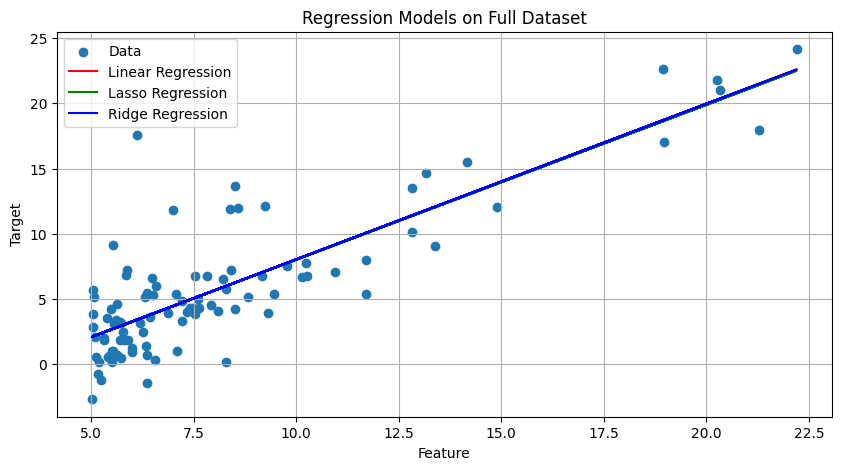

MSE (Linear Regression): 8.953942751950358
MSE (Lasso Regression): 8.954617442633158
MSE (Ridge Regression): 8.953942853998761

Model With Train-Test Split



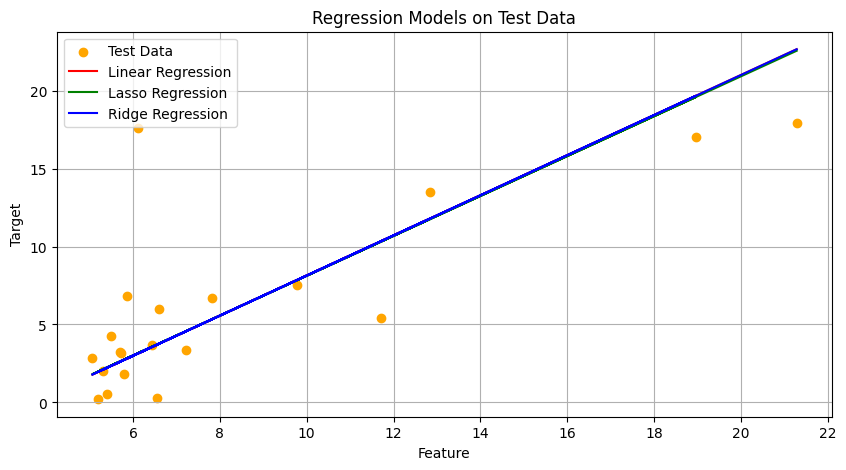

MSE (Linear Regression - Test Set): 15.709362447765187
MSE (Lasso Regression - Test Set): 15.609476591144738
MSE (Ridge Regression - Test Set): 15.70767405372718


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/Food_Truck_Data.csv")
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1].values

print("\nModel Without Train-Test Split\n")
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
predictions = lin_reg.predict(X)
mse_lin = mean_squared_error(Y, predictions)

lasso = Lasso(alpha=0.1)
lasso.fit(X, Y)
predictions_lasso = lasso.predict(X)
mse_lasso = mean_squared_error(Y, predictions_lasso)

ridge = Ridge(alpha=0.1)
ridge.fit(X, Y)
predictions_ridge = ridge.predict(X)
mse_ridge = mean_squared_error(Y, predictions_ridge)

plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label='Data')
plt.plot(X, predictions, label='Linear Regression', color='red')
plt.plot(X, predictions_lasso, label='Lasso Regression', color='green')
plt.plot(X, predictions_ridge, label='Ridge Regression', color='blue')
plt.legend()
plt.title("Regression Models on Full Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True)
plt.show()

print(f"MSE (Linear Regression): {mse_lin}")
print(f"MSE (Lasso Regression): {mse_lasso}")
print(f"MSE (Ridge Regression): {mse_ridge}")



print("\nModel With Train-Test Split\n")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lin_reg.fit(X_train, Y_train)
predictions_test = lin_reg.predict(X_test)
mse_lin_test = mean_squared_error(Y_test, predictions_test)

lasso.fit(X_train, Y_train)
predictions_lasso_test = lasso.predict(X_test)
mse_lasso_test = mean_squared_error(Y_test, predictions_lasso_test)

ridge.fit(X_train, Y_train)
predictions_ridge_test = ridge.predict(X_test)
mse_ridge_test = mean_squared_error(Y_test, predictions_ridge_test)

plt.figure(figsize=(10, 5))
plt.scatter(X_test, Y_test, label='Test Data', color='orange')
plt.plot(X_test, predictions_test, label='Linear Regression', color='red')
plt.plot(X_test, predictions_lasso_test, label='Lasso Regression', color='green')
plt.plot(X_test, predictions_ridge_test, label='Ridge Regression', color='blue')
plt.legend()
plt.title("Regression Models on Test Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True)
plt.show()

print(f"MSE (Linear Regression - Test Set): {mse_lin_test}")
print(f"MSE (Lasso Regression - Test Set): {mse_lasso_test}")
print(f"MSE (Ridge Regression - Test Set): {mse_ridge_test}")